In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima

In [8]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

In [21]:
import pandas as pd

# Caminho do arquivo Excel
arquivo_excel = './dataset.xlsx'

# Nome da aba que você quer carregar
nome_aba = 'historicoLME'

# Lendo o arquivo Excel e carregando a aba especificada em um DataFrame
df = pd.read_excel(arquivo_excel, sheet_name=nome_aba)

# Exibindo as primeiras linhas do DataFrame para ver se está tudo certo
print(df.head())


         MÊS  USD / Ton Cobre  USD / Ton Chumbo  exchange rate USD / €
0 2018-12-01           5964.0            2008.0                 1.1450
1 2019-01-01           6146.0            2089.0                 1.1488
2 2019-02-01           6535.0            2153.0                 1.1416
3 2019-03-01           6484.0            2021.0                 1.1236
4 2019-04-01           6441.0            1940.0                 1.1218


In [22]:
def alterar_ano(data):
    year_str = str(data.year)
    if year_str.startswith('22'):
        new_year_str = '20' + year_str[2:]
        return data.replace(year=int(new_year_str))
    return data

# Aplicar a função no DataFrame
df['MÊS'] = df['MÊS'].apply(alterar_ano)

# Exibindo o DataFrame resultante
print(df)

          MÊS  USD / Ton Cobre  USD / Ton Chumbo  exchange rate USD / €
0  2018-12-01          5964.00           2008.00                 1.1450
1  2019-01-01          6146.00           2089.00                 1.1488
2  2019-02-01          6535.00           2153.00                 1.1416
3  2019-03-01          6484.00           2021.00                 1.1236
4  2019-04-01          6441.00           1940.00                 1.1218
..        ...              ...               ...                    ...
61 2024-01-01          8393.18           2035.21                 1.0903
62 2024-02-01          8342.73           2086.30                 1.0905
63 2024-03-01          8309.36           2083.02                 1.0795
64 2024-04-01          8674.60           2055.90                 1.0872
65 2024-05-01          8393.18           2035.21                 1.0903

[66 rows x 4 columns]


In [23]:
# Nomes das colunas que você quer excluir
colunas_para_excluir = ['USD / Ton Chumbo', 'exchange rate USD / €']

# Excluindo as colunas
dfcobre = df.drop(columns=colunas_para_excluir)

# Exibindo o DataFrame resultante
dfcobre.head()

,MÊS,USD / Ton Cobre
0,2018-12-01,5964.0
1,2019-01-01,6146.0
2,2019-02-01,6535.0
3,2019-03-01,6484.0
4,2019-04-01,6441.0


In [24]:
print(dfcobre.shape)
dfcobre.info()
dfcobre.describe()

(66, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MÊS              66 non-null     datetime64[ns]
 1   USD / Ton Cobre  66 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


,MÊS,USD / Ton Cobre
count,66,66.000000
mean,2021-08-16 03:38:10.909090816,7826.354394
min,2018-12-01 00:00:00,4797.000000
25%,2020-04-08 12:00:00,6442.375000
50%,2021-08-16 12:00:00,8202.940000
75%,2022-12-24 06:00:00,9022.827500
max,2024-05-01 00:00:00,10235.800000
std,NaN,1532.328857


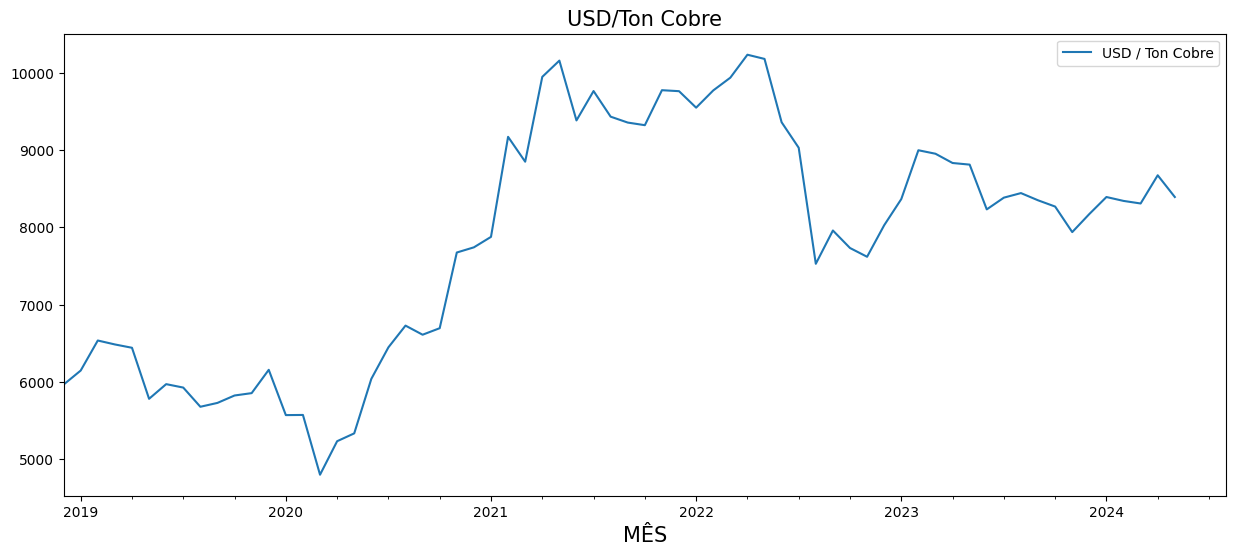

In [13]:
dfcobre.plot(x='MÊS', y='USD / Ton Cobre')
#x=dfcobre['MÊS']
#y=dfcobre['USD / Ton Cobre']
plt.xlabel('MÊS',size=15)
plt.title('USD/Ton Cobre',size=15)
plt.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

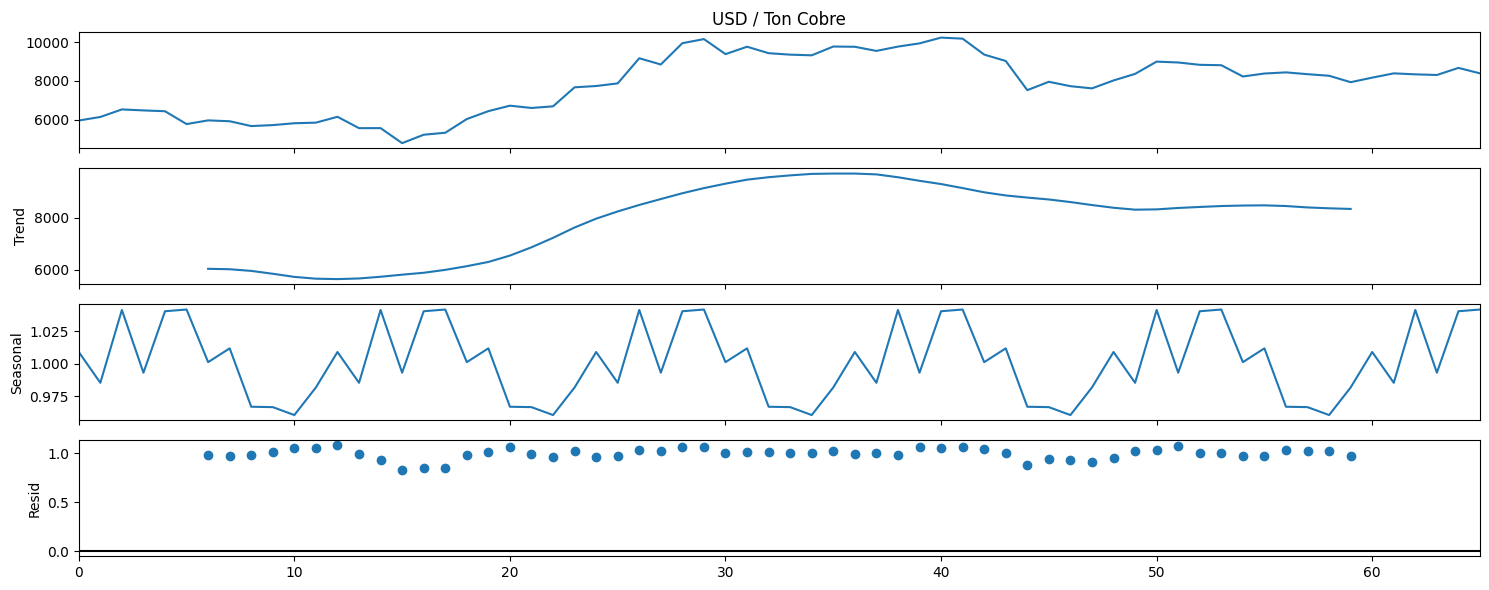

In [28]:
decomposicao = seasonal_decompose(dfcobre['USD / Ton Cobre'], model='multiplicative', period=12)
fig = decomposicao.plot()
plt.tight_layout()
plt.show()